In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast

In [2]:
def draw_frame(box_c, metadata):
    fig = plt.figure()
#     plt.rcParams['font.size'] = '16'
    ax = plt.axes(xlim=(0, 500), ylim=(0, 500))
    plt.axis('square')
    
    bt_ratio = metadata['box_type_ratio']
    colours = ['b','g','r','c','m','y']
    marker_size = 5
    
    idx = 0
    c_idx = 0
    for i in bt_ratio:
        no_boxes = int(i*len(box_c[0]))
        c0 = box_c[0][idx:idx+no_boxes]
        c1 = box_c[1][idx:idx+no_boxes]
        ax.plot(
            c0,
            c1, 
            's', 
            color=colours[c_idx],
    #         fillstyle = 'none',
            markersize = marker_size)
    #         linewidth=2)
        idx += no_boxes
        c_idx += 1

    plt.xticks([0,250,500])
    plt.yticks([0,250,500])
    
def proc_data(data):
    c = {}
    for col in data.columns:
        c_0 = []
        c_1 = []
        for r in data[col]:
            c__ = ast.literal_eval(r)
            c_0.append(c__[0])
            c_1.append(c__[1])
        c[int(col)] = [c_0,c_1]
    return c

def draw_multiple_frames(data,metadata):
    for idx, (key, val) in enumerate(data.items()):
        if idx == len(data)-1:
            draw_frame(val,metadata)
        
def viz(ex,filename):
    data = proc_data(pd.read_csv("data/%s/%s/boxes.csv"%(ex,filename)))
    with open("data/%s/%s/metadata.txt"%(ex,filename), "r") as f:
        metadata = json.loads(f.readline().strip())
    draw_multiple_frames(data,metadata)

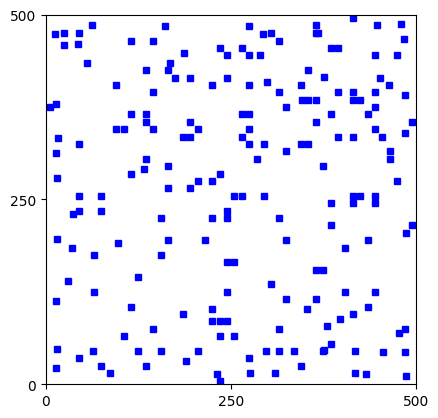

In [3]:
viz("e_1","1746886474")